In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
import matplotlib.pyplot as plt

In [ ]:
train_dir = '/content/drive/MyDrive/ProyekAkhirOrbit/Dataset2080/training'
val_dir = '/content/drive/MyDrive/ProyekAkhirOrbit/Dataset2080/validation'

In [ ]:
img_height = 200
img_width = 200

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        vertical_flip=True,
        horizontal_flip=True,
        rotation_range= 20
        )

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size=(200, 200),
                  class_mode="categorical"
                  )

val_generator = test_datagen.flow_from_directory(
                val_dir,
                target_size=(200, 200),
                class_mode="categorical",
                )

Found 960 images belonging to 6 classes.
Found 240 images belonging to 6 classes.


In [ ]:
class_names = train_generator.class_indices
print(class_names)

{'Jawa': 0, 'Kalimantan': 1, 'Maluku dan Papua': 2, 'Sulawesi': 3, 'Sumatra': 4, 'Sunda kecil': 5}


In [ ]:
from keras import backend

In [ ]:
backend.clear_session()

model = Sequential()

model.add(Conv2D(32, 3, input_shape=(200, 200,3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(128, 3, activation='relu'))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(256, 3, activation='relu'))
model.add(Conv2D(256, 3, activation='relu'))
model.add(MaxPool2D(2, 2))

model.add(Flatten())

model.add(Dense(6, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 44, 44, 128)       1

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'])

In [ ]:
history = model.fit(
          train_generator,
          validation_data=val_generator,
          epochs=50,
          batch_size=32,
)

Epoch 1/50
30/30 [==============================] - 641s 21s/step - loss: 1.7925 - accuracy: 0.1479 - val_loss: 1.7861 - val_accuracy: 0.2333
Epoch 2/50
30/30 [==============================] - 11s 377ms/step - loss: 1.7788 - accuracy: 0.2031 - val_loss: 1.7355 - val_accuracy: 0.3167
Epoch 3/50
30/30 [==============================] - 11s 375ms/step - loss: 1.6972 - accuracy: 0.2573 - val_loss: 1.4579 - val_accuracy: 0.4042
Epoch 4/50
30/30 [==============================] - 11s 376ms/step - loss: 1.4751 - accuracy: 0.4021 - val_loss: 1.2820 - val_accuracy: 0.4708
Epoch 5/50
30/30 [==============================] - 11s 380ms/step - loss: 1.3429 - accuracy: 0.4688 - val_loss: 1.2819 - val_accuracy: 0.4833
Epoch 6/50
30/30 [==============================] - 13s 427ms/step - loss: 1.3351 - accuracy: 0.4854 - val_loss: 1.1584 - val_accuracy: 0.5667
Epoch 7/50
30/30 [==============================] - 11s 372ms/step - loss: 1.2586 - accuracy: 0.5312 - val_loss: 1.1483 - val_accuracy: 0.5500


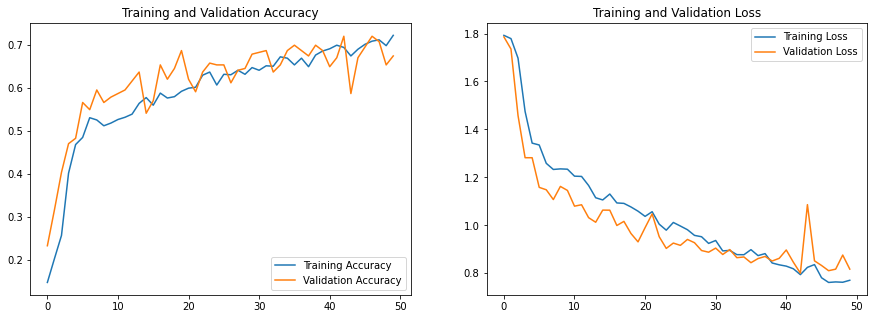

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
score = model.evaluate(train_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

30/30 [==============================] - 10s 332ms/step - loss: 0.7421 - accuracy: 0.7271
Loss: 0.7421
Accuracy: 0.7271


In [ ]:
score = model.evaluate(val_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

8/8 [==============================] - 1s 83ms/step - loss: 0.8172 - accuracy: 0.6750
Loss: 0.8172
Accuracy: 0.6750


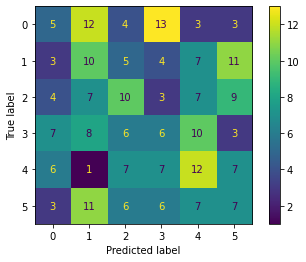

True Positive =  10
False Positive =  12
True Negative =  5
False Negative =  3


In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

Y_pred = model.predict(val_generator, val_generator.n // 32 + 1)
y_pred = np.argmax(Y_pred, axis=1)

confusion_matrix = metrics.confusion_matrix(val_generator.classes, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

print('True Positive = ', confusion_matrix[1,1])
print('False Positive = ', confusion_matrix[0,1])
print('True Negative = ', confusion_matrix[0,0])
print('False Negative = ', confusion_matrix[1,0])

In [ ]:
print('Classification Report')
target_names = ['Jawa', 'Kalimantan', 'Maluku dan Papua', 'Sulawesi', 'Sumatera', 'Sunda Kecil']
print(sklearn.metrics.classification_report(val_generator.classes, y_pred, target_names=target_names))

Classification Report
                  precision    recall  f1-score   support

            Jawa       0.18      0.12      0.15        40
      Kalimantan       0.20      0.25      0.22        40
Maluku dan Papua       0.26      0.25      0.26        40
        Sulawesi       0.15      0.15      0.15        40
        Sumatera       0.26      0.30      0.28        40
     Sunda Kecil       0.17      0.17      0.17        40

        accuracy                           0.21       240
       macro avg       0.21      0.21      0.21       240
    weighted avg       0.21      0.21      0.21       240



In [ ]:
evaluation = pd.DataFrame({'Model': [],
                           'Data_Train': [],
                           'Data_Valid': [],
                           'Epochs': [],
                           'Batch_Size': [],
                           'Loss': [],
                           'Accuracy': []
})

r = evaluation.shape[0]
evaluation.loc[r] = ['CNN', train_generator.n, val_generator.n, 50, 32, score[0], score[1]]
evaluation

,Model,Data_Train,Data_Valid,Epochs,Batch_Size,Loss,Accuracy
0,CNN,960.0,240.0,50.0,32.0,0.817247,0.675


Saving Bali.jpg to Bali.jpg
Bali.jpg
Sunda Kecil


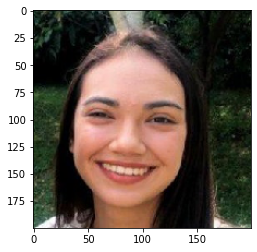

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # prediksi data gambar
  path = fn
  img = image.load_img(path, target_size=(200, 200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  
  print(fn)
  if classes[0,0] == 1.0:
    print('Jawa')
  elif classes[0,1] == 1.0:
    print('Kalimantan')
  elif classes[0,2] == 1.0:
    print('Maluku dan Papua')
  elif classes[0,3] == 1.0:
    print('Sulawesi')
  elif classes[0,4] == 1.0:
    print('Sumatera')
  else:
    print('Sunda Kecil')